<a href="https://colab.research.google.com/github/sujeongzoe/KDT/blob/main/%5BDiabetes%5DLogistic_Regression%2C_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

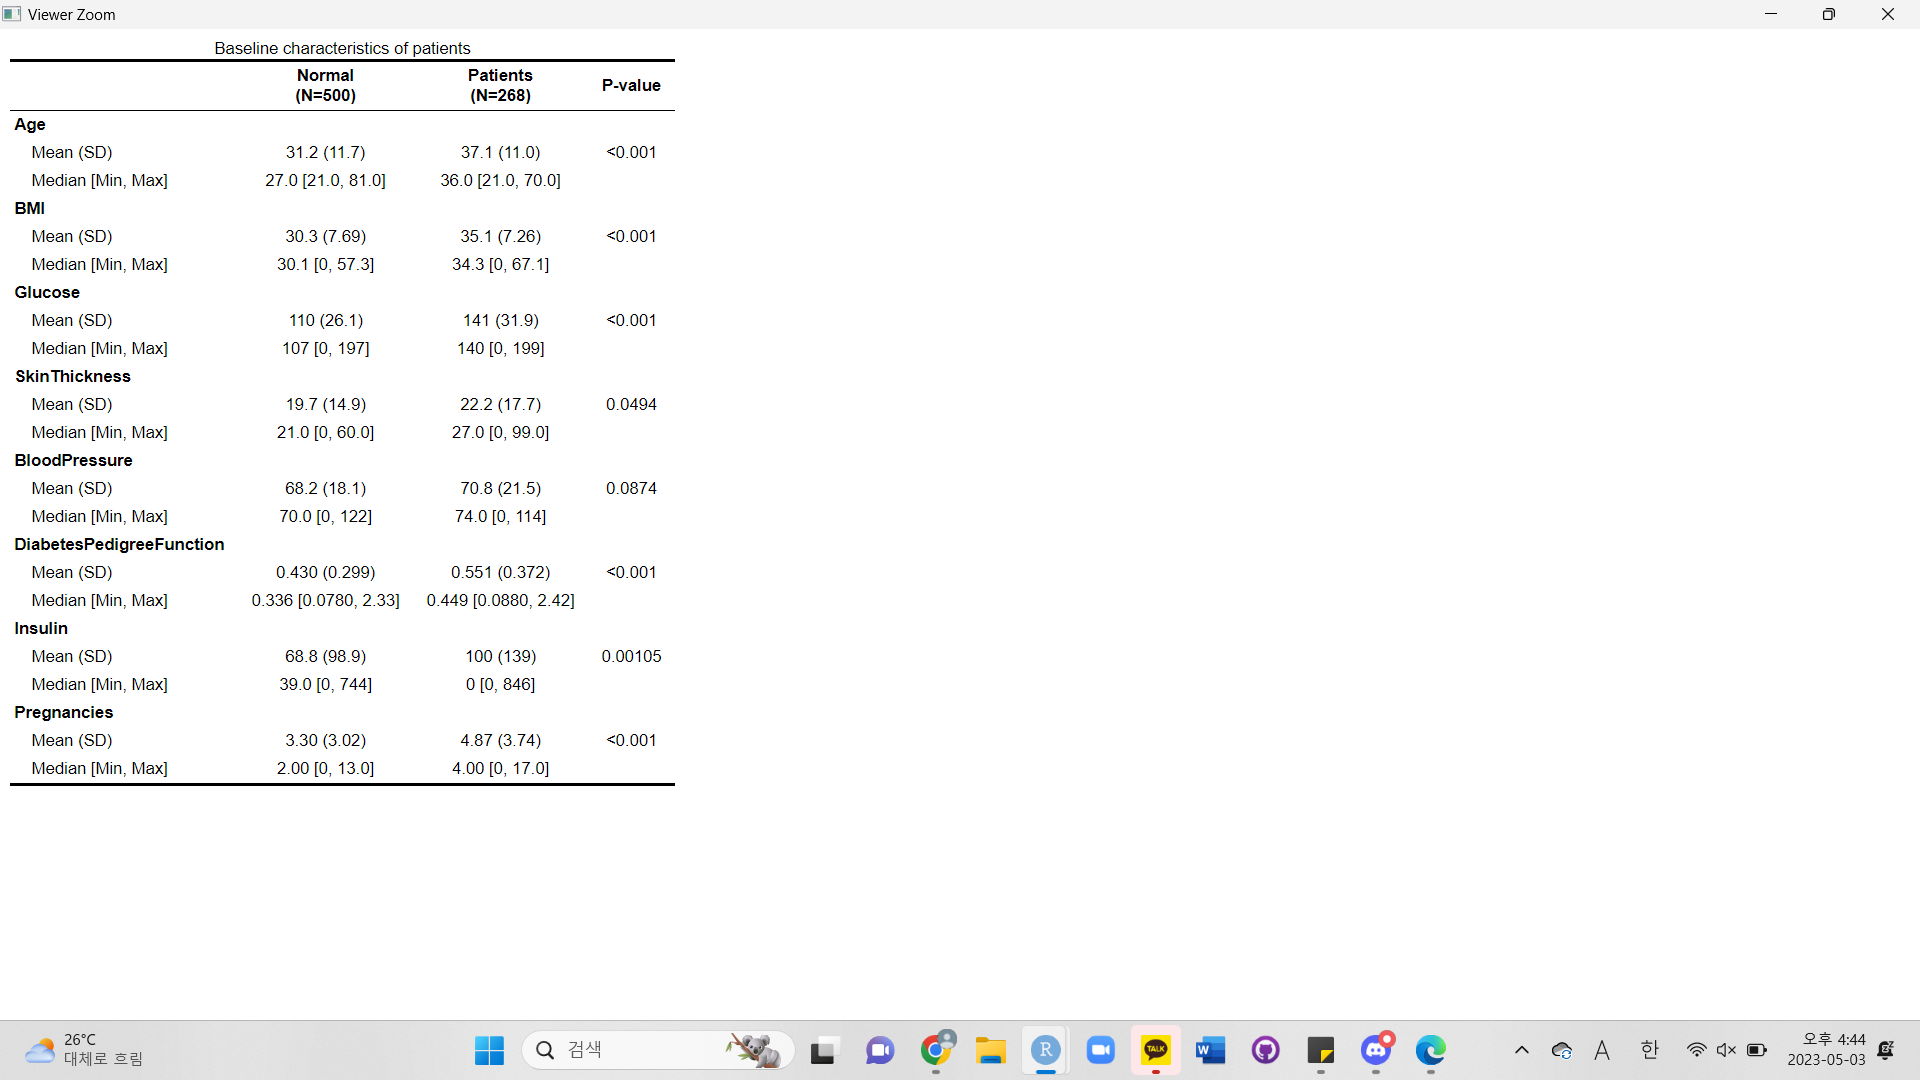

In [ ]:
data.shape

(768, 9)

In [ ]:
get = ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
X = data.loc[:,get]
y = data.iloc[:,-1]
print(X.shape, y.shape)

(768, 7) (768,)


In [ ]:
X.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,35,0,33.6,0.627,50
1,1,85,29,0,26.6,0.351,31
2,8,183,0,0,23.3,0.672,32
3,1,89,23,94,28.1,0.167,21
4,0,137,35,168,43.1,2.288,33


# Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 7) (154, 7) (614,) (154,)


In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)

score

0.7337662337662337

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE

y_pred = reg.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('acc 점수: ' + str(score))
print('RMSE: ', MSE(y_test, y_pred)**0.5)

acc 점수: 0.7337662337662337
RMSE:  0.515978455203089


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg, X, y, cv=5)
print('정확도: ', np.round(scores, 2))
print('정확도 평균 : %0.2f' %(scores.mean()))

정확도:  [0.76 0.74 0.77 0.8  0.77]
정확도 평균 : 0.77


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import recall_score, precision_score, roc_curve, precision_recall_curve

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test, y_pred)
print(classification_report(y_test, y_pred))

오차 행렬
[[85 18]
 [23 28]]
정확도: 0.7338, 정밀도: 0.6087, 재현율: 0.5490,F1: 0.5773, AUC: 0.6871
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       103
           1       0.61      0.55      0.58        51

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



Confusion matrix, without normalization
[[85 18]
 [23 28]]
Normalized confusion matrix
[[0.83 0.17]
 [0.45 0.55]]


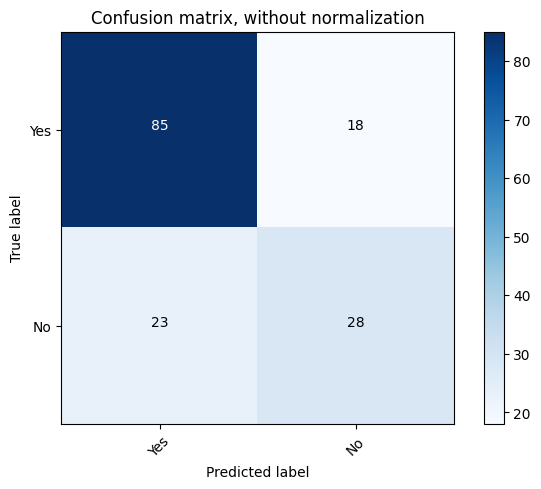

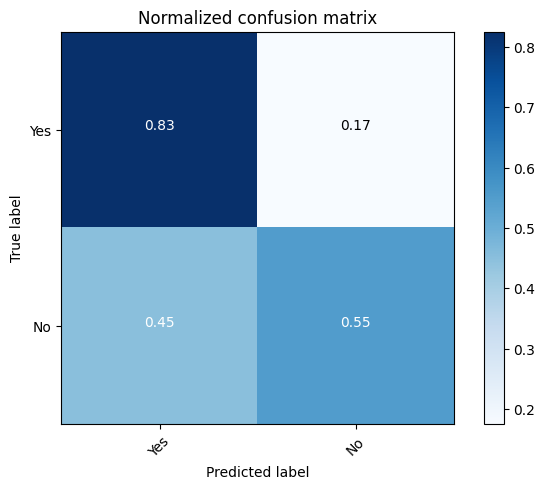

In [ ]:
# confusion matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names = ['Yes', 'No']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

# XGBoost

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# xgboost의 경고를 끄는 법
import xgboost as xgb
xgb.set_config(verbosity=0)

In [ ]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(max_depth=2, n_estimators=50, eta=0.2,
                       subsample=0.8, random_state=777)
xg_clf.fit(X_train, y_train)
y_pred = xg_clf.predict(X_test)
score = accuracy_score(y_pred, y_test)

print('점수: ' + str(score))
print('RMSE: ', MSE(y_test, y_pred)**0.5)

점수: 0.7402597402597403
RMSE:  0.5096471914376255


In [ ]:
scores = cross_val_score(xg_clf, X, y, cv=5)
print('정확도: ', np.round(scores, 2))
print('정확도 평균 : %0.2f' %(scores.mean()))

정확도:  [0.76 0.75 0.77 0.78 0.75]
정확도 평균 : 0.76


<BarContainer object of 7 artists>

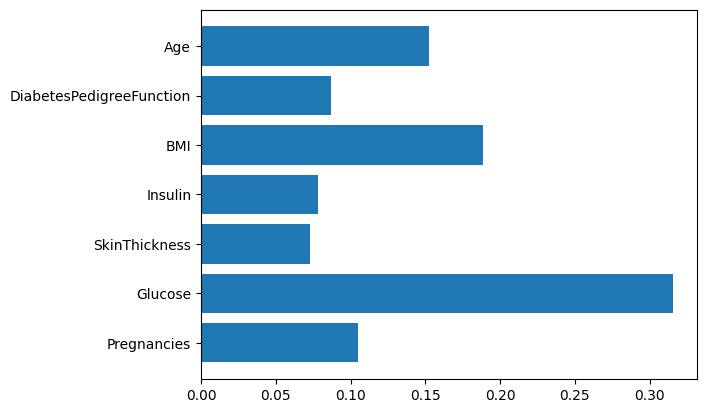

In [ ]:
# feature_importances
xg_clf.fit(X_train, y_train)
import matplotlib.pyplot as plt

plt.barh(X.columns, xg_clf.feature_importances_, align='center')

In [ ]:
get_clf_eval(y_test, y_pred)
print(classification_report(y_test, y_pred))

오차 행렬
[[84 19]
 [21 30]]
정확도: 0.7403, 정밀도: 0.6122, 재현율: 0.5882,F1: 0.6000, AUC: 0.7019
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       103
           1       0.61      0.59      0.60        51

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.74      0.74      0.74       154

